# PyPSA-Earth Sample Network Analysis

This notebook is an introduction to the analysis of unsolved and solved networks generated by PyPSA-Earth tutorial.

## Folder structure and loading networks

Building the folder structure is the first step:

- Start by creating a folder named pypsa-earth-project by executing the following line in the terminal:
    ```
        $ mkdir pypsa-earth-project
    ```
- Change the current directory to that folder:
    ```
        $ cd pypsa-earth-project
    ```
- Clone pypsa-earth repository from GitHub into the folder:
    ```
        $ git clone https://github.com/pypsa-meets-earth/pypsa-earth.git 
    ```
- Finally Clone documentation repository into the folder:
    ```
        $ git clone https://github.com/pypsa-meets-earth/documentation.git
    ```

The following script imports required modules to run the network analysis:

In [1]:
!pwd

/Users/gbotemi/Documents/code/PYPSA/africa-master-plan/gis-analysis


In [2]:
import os
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import sys
import pandas as pd
from zipfile import ZipFile
import sys
import yaml

# change current directory to parent folder
if not os.path.isdir("pypsa-earth"):
    os.chdir("../")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")
    
from _helpers import sets_path_to_root, progress_retrieve

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


Load networks:

The following table provides a summary of the output networks from the sequencing scripts used in this tutorial case:

| Script                | Network file                             |
| -----------           | -----------                              |
| base_network          | base.nc                                  |
| add_electricity       | elec.nc                                  |
| simplify_network      | elec_s.nc                                |
| cluster_network       | elec_s_6.nc                              |
| add_exta_components   | elec_s_6_ec.nc                           |
| prepare_netwrok       | elec_s_6_ec_lcopt_Co2L-4H.nc (unsolved)  | 
| solve_all_networks    | elec_s_6_ec_lcopt_Co2L-4H.nc (solved)    | 

each of which can be loaded and analysed:

In [3]:
PARENT = os.path.realpath("pypsa-earth/") + "/"
config = yaml.safe_load(open(PARENT + "config.yaml"))

# Read config.yaml settings:
name = config["run"]["name"]

In [4]:
unsolved_network = os.getcwd() + f"/pypsa-earth/networks/{name}/elec_s_30_ec_lcopt_Co2L-24H.nc"

In [5]:
#add_electricity_network = os.getcwd() + '/networks/unsolved/elec.nc'
#clustered_network = os.getcwd() + '/networks/unsolved/elec_s_6.nc'
# n_add_el = pypsa.Network(add_electricity_network)
# n_cluster = pypsa.Network(clustered_network)
solved_network = os.getcwd() + f"/pypsa-earth/results/{name}/networks/elec_s_30_ec_lcopt_Co2L-24H.nc"
n_solve = pypsa.Network(solved_network)


/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas.

In [6]:
n = n_solve

Plot network nodes and lines by simply executing:

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x177c83c70>,
 <matplotlib.collections.LineCollection at 0x178adc370>)

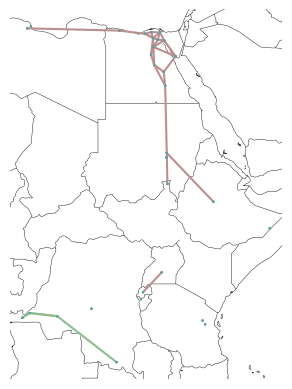

In [7]:
n.plot()

## Network components

PyPSA has a group of components tha are already built-in such as generators, loads, lines, etc.. While allowing the user to override this and build their custom components, read more at [PyPSA Design](https://pypsa.readthedocs.io/en/latest/components.html#groups-of-components). 

The built-in components can be static or time-varying. Time-varying components can be obtained by adding `_t` to the component:

- network.generator     &rarr; static component
- network.generator_t   &rarr; time-varying component

A list of the buit-in PyPSA components and their associated attributes can be found at [PyPSA Components](https://pypsa.readthedocs.io/en/latest/components.html).

For example, the [Generator](https://pypsa.readthedocs.io/en/latest/components.html#generator) component has an attribute of `p_nom_opt`, which represent the optimised nominal power. This output can be obtained by the following line:


In [8]:
n.generators.p_nom_opt.head(2) # "head" returns the first 2 rows

Generator
BI6 0 csp       0.0
BI6 0 onwind    0.0
Name: p_nom_opt, dtype: float64

To get the number of components and snapshots in the network: 

In [9]:
n.statistics._parent

PyPSA Network
Components:
 - Bus: 120
 - Carrier: 19
 - Generator: 198
 - GlobalConstraint: 1
 - Line: 29
 - Link: 154
 - Load: 30
 - StorageUnit: 10
 - Store: 90
Snapshots: 365

## Network analysis

The following network analysis scripts were inspired by the work of Fabian Neumann in this [video](https://www.youtube.com/watch?v=mAwhQnNRIvs&t=734s) with PyPSA-EUR, which has a similar model structure as PyPSA-Earth

## Static components data


Static data for various components such as generators, lines and storage units can be obtained directly through the following lines, with the ability to manipulate the data:

In [10]:
n.lines.head(2)

,bus0,bus1,num_parallel,length,carrier,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,...,build_year,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,EG0 0,EG0 11,3.789474,333.441239,AC,Al/St 240/40 4-bundle 380.0,0.7,6434.915160,13749.957859,True,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,EG0 0,EG0 5,0.578947,203.705496,AC,Al/St 240/40 4-bundle 380.0,0.7,983.112038,8399.155741,True,...,0,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [11]:
n.generators.head(2)

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,carrier,bus,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BI6 0 csp,7230.338208,852.213933,0.0,8989.205505,1.0,0.0,0.010509,False,csp,BI6 0 csp,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
BI6 0 onwind,7415.635808,71.471563,0.0,96085.888020,1.0,0.0,0.024553,True,onwind,BI6 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [12]:
n.storage_units.head(2)

,max_hours,p_min_pu,p_nom,efficiency_store,efficiency_dispatch,cyclic_state_of_charge,carrier,capital_cost,bus,marginal_cost,...,sign,marginal_cost_quadratic,build_year,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
CD1 0 hydro,75.570327,0.0,871.541401,0.0,0.9,True,hydro,0.0,CD1 0,0.010630,...,1.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0
CD4 0 hydro,75.570327,0.0,1775.000000,0.0,0.9,True,hydro,0.0,CD4 0,0.009689,...,1.0,0.0,0,inf,0.0,False,NaN,True,0.0,0.0


In [13]:
n.stores.head(2)

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,type,e_nom,e_nom_min,e_nom_max,...,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,marginal_cost_quadratic,standing_loss,build_year,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,
BI6 0 H2,BI6 0 H2,H2,True,True,1399.025482,0.009956,,0.0,0.0,inf,...,False,True,0.0,0.0,1.0,0.0,0.0,0,inf,0.0
CD1 0 H2,CD1 0 H2,H2,True,True,1399.025482,0.009705,,0.0,0.0,inf,...,False,True,0.0,0.0,1.0,0.0,0.0,0,inf,0.0


In [14]:
n.loads.head(2) # no results because loads are mostly time dependent

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
BI6 0,BI6 0,,,0.0,0.0,-1.0
CD1 0,CD1 0,,,0.0,0.0,-1.0


## Time-varying components data

PyPSA-Earth has several components to refelct time-varying behaviour of energy systems, including loads, generators, storage units, etc..

Excute the following line to get results of time-varying load:

In [15]:
n.loads_t.p_set.head(2)

Load,CD1 0,CD10 0,CD4 0,CD5 0,CD9 0,EG0 0,EG0 1,EG0 10,EG0 11,EG0 12,...,LY0 0,LY8 0,RW2 0,SD0 0,SD12 0,SO3 0,SS0 0,TZ11 0,TZ7 0,UG2 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01,187.557129,30.052235,200.408649,271.549560,343.704766,710.297711,2569.612298,2596.024811,169.445124,60.894265,...,5686.377609,358.336468,2354.729213,1876.946664,108.281175,775.551784,74.105681,1125.096335,1070.512984,607.266811
2013-01-02,187.782235,30.088304,200.649179,271.875473,344.117280,704.479578,2548.564297,2574.760462,168.057179,60.395473,...,5667.691442,357.158928,2364.481327,1885.829661,108.793636,779.189032,75.097512,1123.640376,1069.583225,606.475607


Aggregate time-varying loads along columns to get aggregated time series for the whole system, and plot them using the following line

<AxesSubplot:xlabel='snapshot', ylabel='MW'>

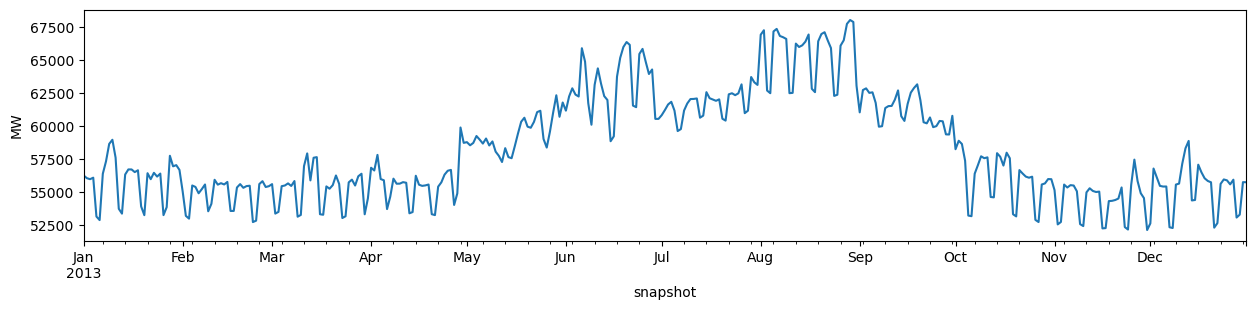

In [16]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

Time-varying capacity factors for renewable generators

In [17]:
n.generators_t.p_max_pu.head(2)

Generator,BI6 0 csp,BI6 0 onwind,BI6 0 ror,BI6 0 solar,CD1 0 csp,CD1 0 onwind,CD1 0 ror,CD1 0 solar,CD10 0 csp,CD10 0 onwind,...,TZ7 0 csp,TZ7 0 offwind-ac,TZ7 0 offwind-dc,TZ7 0 onwind,TZ7 0 ror,TZ7 0 solar,UG2 0 csp,UG2 0 onwind,UG2 0 ror,UG2 0 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.117386,0.0,0.485097,0.156722,0.131252,0.0,0.652457,0.156171,0.035564,0.010720,...,0.152455,0.313477,0.257501,0.020589,0.10849,0.167203,0.158253,0.018343,0.296643,0.165394
2013-01-02,0.134362,0.0,0.538423,0.161301,0.112697,0.0,0.642844,0.158621,0.130072,0.010947,...,0.112929,0.553489,0.614128,0.032471,0.08631,0.147526,0.171233,0.022734,0.324082,0.172634


Specify a particular time period and generator location for the capacity factor:

<AxesSubplot:xlabel='snapshot'>

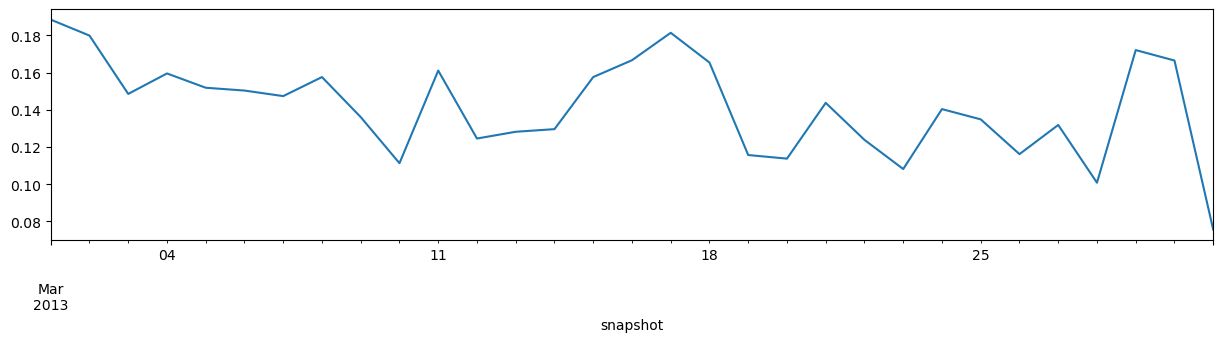

In [18]:
n.generators_t.p_max_pu.loc["2013-03", "BI6 0 solar"].plot(figsize=(15,3))

<AxesSubplot:xlabel='snapshot'>

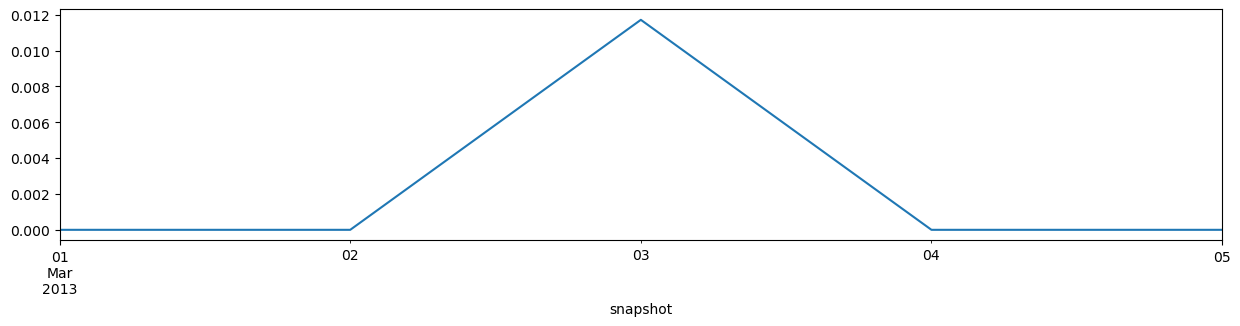

In [19]:
n.generators_t.p_max_pu.loc["2013-03-01":"2013-03-05", "BI6 0 onwind"].plot(figsize=(15,3))

## Solved network outputs

Aftwer solving the network, optimized outputs and system costs can be obtained and analysed

Total annual system costs in billion euros per year:

In [20]:
n.objective / 1e9

10.91548765

Transmission lines Expansion:

In [21]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5) # optimized line capacity compared to original capacity

Line
1    2032.074840
2     310.457962
3    1645.416197
4    4072.657533
5     310.457962
dtype: float64

Optimised generator capacity:

In [22]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

carrier
CCGT          6.768924e+01
biomass       6.140000e-01
csp           0.000000e+00
geothermal    1.092000e+00
load          2.800000e+07
nuclear       1.194000e+00
offwind-ac    0.000000e+00
offwind-dc    0.000000e+00
oil           1.507544e+01
onwind        2.121373e+00
ror           2.364614e+00
solar         2.853984e+02
Name: p_nom_opt, dtype: float64

Optimised storage capacity:

In [23]:
n.storage_units.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

carrier
PHS       2.40000
hydro    22.31849
Name: p_nom_opt, dtype: float64

Average daily state of charge for storage units:

<AxesSubplot:xlabel='snapshot'>

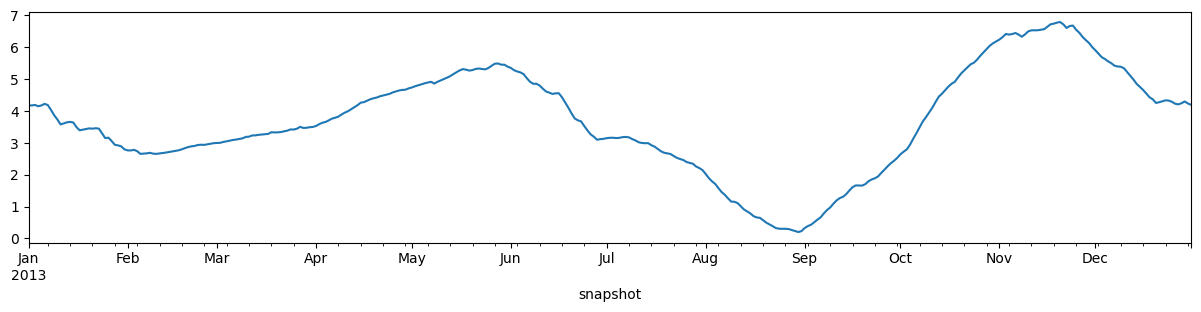

In [24]:
(n.storage_units_t.state_of_charge.sum(axis=1).resample('D').mean() / 1e6).plot(figsize=(15,3)) #TWh

State of charge for a period of time to a particular storage technology:

<AxesSubplot:xlabel='snapshot'>

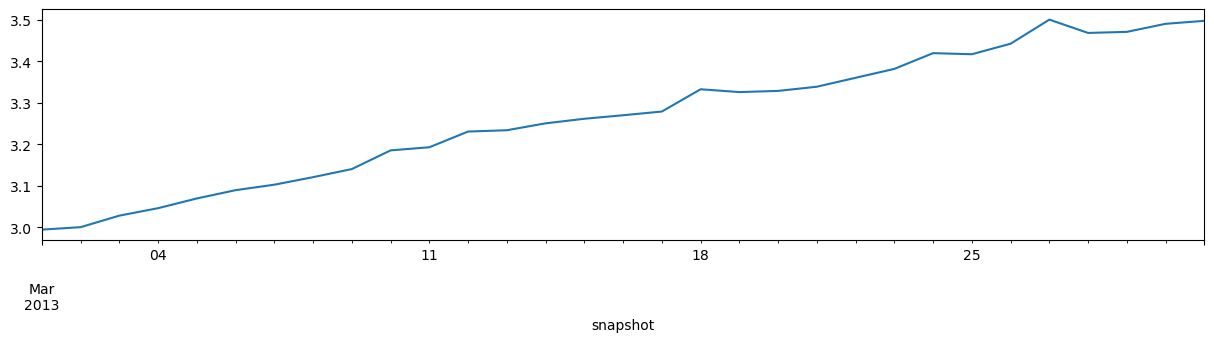

In [25]:
(n.storage_units_t.state_of_charge.loc["2013-03"].filter(like="hydro", axis=1).sum(axis=1) / 1e6).plot(figsize=(15,3)) #TWh

## Network Statistics

It is possible to get direct analysis values of the network and plot them, including Capacity Factor, Capital Expenditure, Curtailment, Installed Capacity, Operational Expenditure, Optimal Capacity, Revenue, Supply and Withdrawal

In [26]:
n.statistics()

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

Capacity Factor  Capital Expenditure  \
            carrier                                                      
Generator   Biomass                  7.569647e-01         1.707430e+08   
            Combined-Cycle Gas       5.195547e-03         6.703111e+09   
            Csp                               NaN         0.000000e+00   
            Geothermal               1.000000e+00         3.652546e+08   
            Nuclear                  7.081439e-01         8.438865e+08   
            Offshore Wind (AC)                NaN         0.000000e+00   
            Offshore Wind (DC)                NaN         0.000000e+00   
            Oil                      1.278537e-03         5.709192e+08   
            Onshore Wind             2.127666e-01         2.038340e+08   
            Run of River             3.002609e-01         7.073512e+08   
            Solar                    1.754400e-01         1.016077e+10   
            load                     2.396767e-07         0.000000e+00   
Line        AC                       2.594653e-01         2.287875e+09   
Link        Csp                               NaN         0.000000e+00   
            DC                       6.059963e-02         9.937695e+08   
            H2 electrolysis                   NaN         0.000000e+00   
            H2 fuel cell                      inf         0.000000e+00   
            battery charger                   NaN         0.000000e+00   
            battery discharger                NaN         0.000000e+00   
Load        -                                 NaN                  NaN   
StorageUnit Pumped Hydro Storage     0.000000e+00         4.256285e+08   
            Reservoir & Dam          1.893155e-01         0.000000e+00   
Store       Battery Storage                   NaN         0.000000e+00   
            Csp                               NaN         0.000000e+00   
            Hydrogen Storage                  NaN         0.000000e+00   

                                   Curtailment      Dispatch  \
            carrier                                            
Generator   Biomass               0.000000e+00  4.071441e+06   
            Combined-Cycle Gas    0.000000e+00  3.080740e+06   
            Csp                   0.000000e+00  0.000000e+00   
            Geothermal            0.000000e+00  9.565920e+06   
            Nuclear               0.000000e+00  7.406788e+06   
            Offshore Wind (AC)    0.000000e+00  0.000000e+00   
            Offshore Wind (DC)    0.000000e+00  0.000000e+00   
            Oil                   0.000000e+00  1.688447e+05   
            Onshore Wind          1.179311e+06  3.953890e+06   
            Run of River          3.732485e+05  6.219611e+06   
            Solar                 1.467864e+07  4.386159e+08   
            load                  0.000000e+00  5.878789e+04   
Line        AC                             NaN  1.198770e+07   
Link        Csp                            NaN  0.000000e+00   
            DC                             NaN -7.152451e+06   
            H2 electrolysis                NaN  0.000000e+00   
            H2 fuel cell                   NaN  3.790032e-07   
            battery charger                NaN  0.000000e+00   
            battery discharger             NaN  0.000000e+00   
Load        -                              NaN -5.101550e+08   
StorageUnit Pumped Hydro Storage  0.000000e+00  0.000000e+00   
            Reservoir & Dam       0.000000e+00  3.701307e+07   
Store       Battery Storage                NaN  0.000000e+00   
            Csp                            NaN  0.000000e+00   
            Hydrogen Storage               NaN -3.790032e-07   

                                  Installed Capacity  Market Value  \
            carrier                                                  
Generator   Biomass                     6.140000e+02  3.292726e+01   
            Combined-Cycle Gas          6.768924e+04  4.130418e+01   
            Csp           

Plotting the capital expendture for various generators:

<AxesSubplot:xlabel='carrier', ylabel='Euros'>

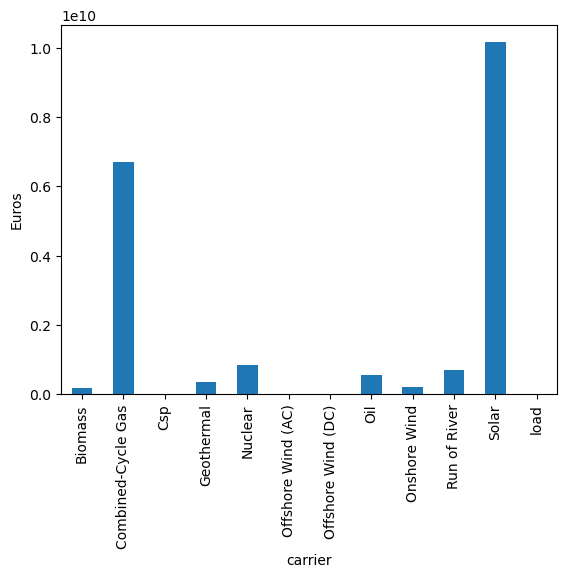

In [27]:
n.statistics()["Capital Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")

## Sample plots of networks and outputs

Plot lines and their loading:

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(12.767572500000002, 47.4456775, -13.116803846153847, 33.99001923076923)

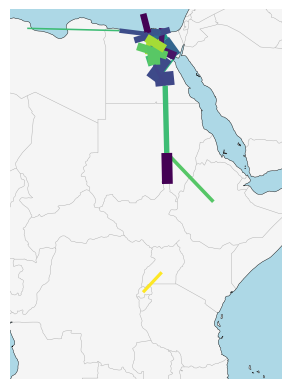

In [28]:
loading = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)
# Example types of projections: PlateCarree, Mercator, Orthographic
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
n.plot(ax=ax,
    bus_colors='gray',
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3,
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0
)
ax.axis('off')

Plot hourly dispatch in a particular period of time:

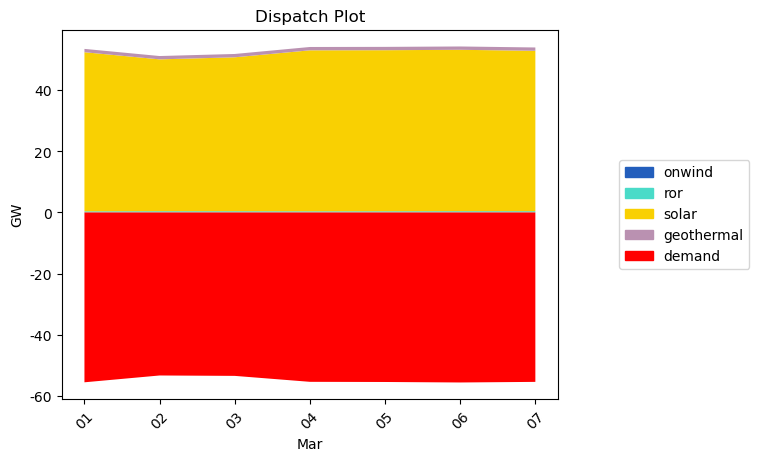

In [29]:
first_date = "2013-03-01"
second_date = "2013-03-07"

colors = {key.lower(): value.lower() for key, value in config["plotting"]["tech_colors"].items()}

generator_carriers = n.generators.carrier.unique()[:-1] # Exclude "load"
store_carriers = n.stores.carrier.unique()

generators = pd.DataFrame()
for carrier in generator_carriers:
    generators = pd.concat([generators, n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().T[carrier]], axis=1)
generators = generators.T[generators.max() != 0].T

# Filter store carriers to include only "h2" and "battery"
stores = pd.DataFrame()
re_store_carriers = [idx for idx in store_carriers if idx.lower() in ["h2", "battery"]]
for carrier in re_store_carriers:
    stores = pd.concat([stores, n.stores_t.p.loc[first_date:second_date].T.groupby(n.stores.carrier).sum().T[carrier]], axis=1)
stores = stores.T[stores.max() != 0].T

generator_colors = {idx: colors[idx.lower()] for idx in generator_carriers if idx.lower() in colors}
store_colors = {idx: colors[idx.lower()] for idx in re_store_carriers if idx.lower() in colors}

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1) * -1
stores["demand"] = demand
store_colors["demand"] = "#ff0000"

# Extract battery data from stores
if "battery" in stores.columns:
	battery = stores["battery"]
     
	nbattery = [idx if idx < 0 else 0 for idx in battery]
	pbattery = [idx if idx > 0 else 0 for idx in battery]

	# Add the positive battery data to generators and negative battery data to stores
	generators["pbattery"] = pbattery
	stores["nbattery"] = nbattery

	# Append color for the battery components to the colors lists
	generator_colors.append("#ea048a")
	store_colors.append("#ea048a")

# Create legend handles for each generator and store column
handles = []
for idx in generators.columns:
    handle = mpatches.Patch(color=generator_colors.get(idx), label=idx)
    handles.append(handle)

for idx in stores.columns:
    handle = mpatches.Patch(color=store_colors.get(idx), label=idx)
    handles.append(handle)

generator_colors = [generator_colors[idx] for idx in generators.columns if idx in generator_colors.keys()]
store_colors = [store_colors[idx] for idx in stores.columns if idx in store_colors.keys()]

fig, ax = plt.subplots()
plt.stackplot(generators.index, generators.T, labels=generators.columns, colors=generator_colors, zorder=3)
plt.stackplot(generators.index, stores.T, labels=stores.columns, colors=store_colors, zorder=3)

# Format plot
plt.xticks(rotation=45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GW')
ax.set_xlabel('Mar')
plt.title("Dispatch Plot")
ax.legend(handles=handles, loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show()


## Additional analysis and validation

The following notebooks provide additional analysis, plots and validation of the networks:

[Plot osm network](./0_build_osm_network_plot.ipynb)

[Explore network](./0_network_exploration.ipynb)

[Check outputs of build_shapes script](./0build_shapes.ipynb)

[Compare shapes for countries](./0shape_comparison.ipynb)

[Check base network](./base_network.ipynb)

[Check outputs of add_electricity script](./add_electricity.ipynb)

[Check outputs of augmented_line_connections script](./augmented_line_connections.ipynb)

[Test the built cutouts](./build_cutout.ipynb)

[Test the renewable profiles](./build_renewable_profiles.ipynb)

[Check land use availability](./land_use_availability.ipynb)

[Check network characteristics before solving](./network_characteristics_before_solve.ipynb)

[Some nice plots for presentations](./nice_plotting_for_presentations.ipynb)

[Download OSM and make adjustments](./openstreetmap_download_and_adjustments.ipynb)

[Visualise clustering](./visualise_clustering.ipynb)

The following notebooks could be used for validation:

[Capacity validation](./capacity_validation.ipynb)

[Demand validation](./demand_validation.ipynb)

[Hydro generation validation](./hydro_generation_validation.ipynb)

[Network validation](./network_validation.ipynb)

[Renewable potential validation](./renewable_potential_validation.ipynb)


